# Efeito gravimétrico de formas simples: esfera e prisma

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import prism_grav

In [3]:
import sphere_grav

## Gerando os parâmetros das coordenadas

In [4]:
Nx = 100
Ny = 50
ymin = -2000.
ymax = 2000.
xmin = -2000.
xmax = 2000.
area = [xmin,xmax,ymin,ymax]
shape = (Nx,Ny)

In [5]:
dx = (xmax - xmin)/(Nx-1)
dy = (ymax - ymin)/(Ny-1)

In [6]:
x = np.linspace(area[0],area[1],num=Nx)
y = np.linspace(area[2],area[3],num=Ny) 
yc,xc = np.meshgrid(y,x)

In [7]:
voo = -100.
zc = voo*np.ones_like(xc)

In [8]:
coordinates = np.array([yc.ravel(),xc.ravel(),zc.ravel()])

## Efeito gravimétrico de uma esfera

### Gerando os parâmetros da esfera

In [9]:
densidades = np.array([3000.])

In [10]:
modelo = np.array([[0.,0.,450.,100.]])

### Calculando as componentes do campo 

In [11]:
gx = sphere_grav.gravitational(coordinates,modelo,densidades,field="gx").reshape(shape)

In [12]:
gy = sphere_grav.gravitational(coordinates,modelo,densidades,field="gy").reshape(shape)

In [13]:
gz = sphere_grav.gravitational(coordinates,modelo,densidades,field="gz").reshape(shape)

### Visualização dos dados calculados

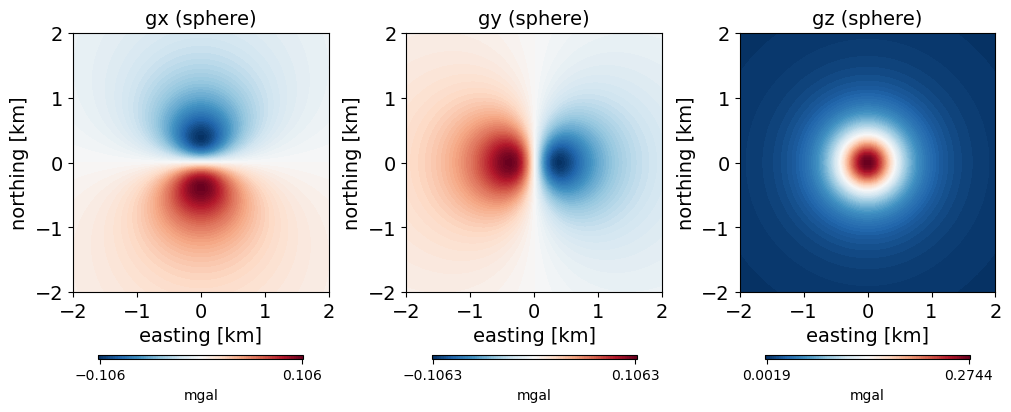

In [14]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(10,4), layout='constrained')

fields = [gx,gy,gz]
names = ["gx","gy","gz"]
for i in range(len(names)):
    plt.subplot(1,len(names),i+1)
    plt.title(names[i] + ' (sphere)', fontsize=title_font)
    plt.xlabel('easting [km]', fontsize = title_font)
    plt.ylabel('northing [km]', fontsize = title_font)
    plt.contourf(1e-3*yc,1e-3*xc,fields[i],100,cmap='RdBu_r')
    plt.tick_params(axis='both', which='major', labelsize=bottom_font)
    cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='mgal',ticks=[fields[i].min(), fields[i].max()])
    cb.ax.tick_params(labelsize=10)

file_name = 'images/grav_sphere'
plt.savefig(file_name+'.png',dpi=200)
plt.show()

## Efeito gravimétrico de um prisma

### Gerando os parâmetros do prisma

In [15]:
densidades = np.array([3000.])

In [16]:
modelo = np.array([[-50.,50.,-800.,800.,100.,250.]])

### Cálculo das componentes do campo

In [17]:
gx = prism_grav.gravitational(coordinates,modelo,densidades,field="gx").reshape(shape)

In [18]:
gy = prism_grav.gravitational(coordinates,modelo,densidades,field="gy").reshape(shape)

In [19]:
gz = prism_grav.gravitational(coordinates,modelo,densidades,field="gz").reshape(shape)

### Visualização dos dados calculados 

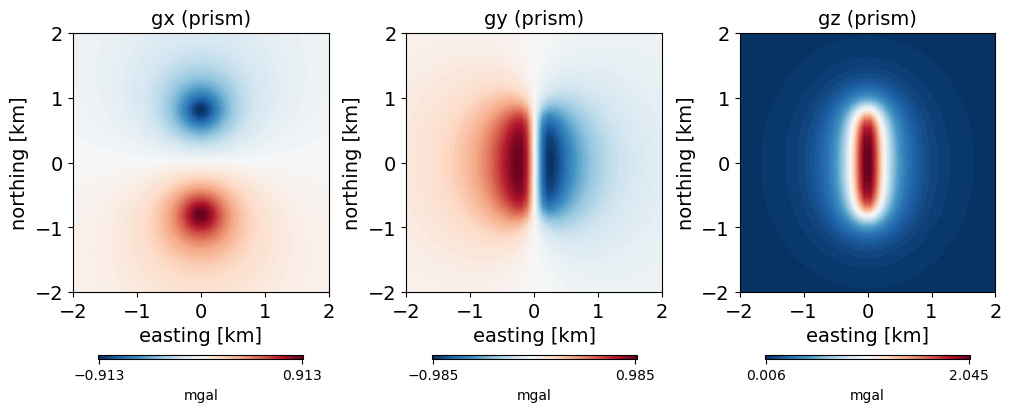

In [20]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(10,4), layout='constrained')

fields = [gx,gy,gz]
names = ["gx","gy","gz"]
for i in range(len(names)):
    plt.subplot(1,len(names),i+1)
    plt.title(names[i] + ' (prism)', fontsize=title_font)
    plt.xlabel('easting [km]', fontsize = title_font)
    plt.ylabel('northing [km]', fontsize = title_font)
    plt.contourf(1e-3*yc,1e-3*xc,fields[i],100,cmap='RdBu_r')
    plt.tick_params(axis='both', which='major', labelsize=bottom_font)
    cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='mgal',ticks=[fields[i].min(), fields[i].max()])
    cb.ax.tick_params(labelsize=10)

file_name = 'images/grav_prism'
plt.savefig(file_name+'.png',dpi=200)
plt.show()